<a href="https://colab.research.google.com/github/RushiK134/LetsGrowMore_Internship_projects/blob/main/Stock_Prediction_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore Virtual Internship Program ( Feb2023 )**

**Auther : Rushikesh Katole**

**Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM**

**Leven : Beginner**

In this model I used the Stacked LSTM(Long Short Term Memory). A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

# **Stock Market Prediction And Forecasting Using Stacked LSTM**


Import Librarys

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Load Dataset

In [ ]:
data = pd.read_csv("/content/NSE-TATAGLOBAL1.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
# sort with date
data['Date'] = pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1,1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
2,1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
3,1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
4,2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


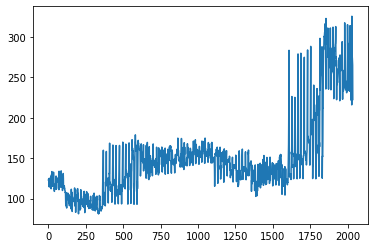

In [ ]:
plt.plot(df['Close'])


In [ ]:
df1 = df['Close']

Prepare Data

In [ ]:
# LSTM are sensitive to the scale of the data, therfore applying MinMax scaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.76245915],
       [0.75265523],
       [0.57883987]])

In [ ]:
#  Splitting data into train and test split
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1424, 611)

In [ ]:
#  Converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step), 0]     # i=0 0,1,2,3------99 100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#  Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Model Building

In [ ]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 12s 268ms/step - loss: 0.0096 - val_loss: 0.0031
Epoch 2/60
19/19 [==============================] - 5s 263ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 3/60
19/19 [==============================] - 4s 194ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 4/60
19/19 [==============================] - 4s 194ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 5/60
19/19 [==============================] - 5s 267ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 6/60
19/19 [==============================] - 4s 197ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 7/60
19/19 [==============================] - 4s 197ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/60
19/19 [==============================] - 5s 245ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/60
19/19 [==============================] - 4s 204ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 10/60
19/19 [==============================] - 4s 199ms/step - loss: 0.0025 - val_loss: 0.002

In [ ]:
#  Lets do the prediction and check prtformance metrics
test_predict = model.predict(X_test)

In [ ]:
# transform back to original form
test_predict1=scaler.inverse_transform(test_predict)

In [ ]:
test_predict1

NameError: ignored

In [ ]:
#  Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

0.1388101834698772